## Which games are better?

We are working for the on-line store Ice, which sells video games all over the world. Historical data on game sales are available from open sources. We need to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns.

## Purposes of the analysis.

Purposes of the analysis are to determine the factors which make the games more successful. We will choose the platforms with the greatest total sales and find platforms that used to be popular but now have zero sales. We will evaluate how user and professional reviews affect sales for one of the most popular platforms. We will also find the genres with high and low sales. For each region we will find the TOP 5 platforms and the TOP 5 genres. We will also investigate whether ESRB ratings affect sales in individual regions. After that we will test the Hypotheses.

## Hypotheses:
<ol>
<li>Average user ratings of the Xbox One and PC platforms are the same.</li>
<li>Average user ratings for the Action and Sports genres are different, Action genre games have higher ratings.</li>
</ol>
Our next steps will be opening the data file and study the general information, converting the data to the necessary types, finding and eliminating errors in the data, analyzing the data and testing the hypotheses.

## Initialization.

In [52]:
#Importing libraries
! pip install sidetable -qq
! pip install matplotlib --user -Uq

# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from functools import reduce
import sidetable

## Load data.

In [53]:
# Load the data file
try:
    data = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    data = pd.read_csv('/Volumes/KINGSTON/Docs/Rovner/Israel/Course Data Analyst/Integrate Project/moved_games.csv')

### Explore initial data.

Data contains the following columns:

* `Name` - Name of the game
* `Platform` - Platform where game was placed
* `Year_of_Release` - Year when game was released
* `Genre` - Genre of the game
* `NA_sales` - North American sales in USD million
* `EU_sales` - Sales in Europe in USD million
* `JP_sales` - Sales in Japan in USD million
* `Other_sales` - Sales in other countries in USD million
* `Critic_Score` - Maximum of 100. Points that critics gave to the game in their review
* `User_Score` - Maximum of 10. Points that users gave to the game in their review
* `Rating` ESRB rating. The Entertainment Software Rating Board evaluates a games content and assigns an age rating such as Teen or Mature.

In [54]:
# printing the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [55]:
# print a head of data
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [56]:
# print a tail of data
data.tail(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [57]:
# print a sample of data
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12355,Zill O'll Infinite Plus,PSP,2009.0,Role-Playing,0.00,0.00,0.06,0.00,NaN,NaN,NaN
11468,The Italian Job,XB,2003.0,Racing,0.06,0.02,0.00,0.00,54.0,5.8,T
1746,NASCAR Thunder 2002,PS2,2001.0,Racing,0.57,0.44,0.00,0.15,85.0,8.5,E
15689,Puzzle Guzzle,PSP,2007.0,Puzzle,0.02,0.00,0.00,0.00,65.0,tbd,E
4654,NBA Jam,PS2,2003.0,Sports,0.20,0.16,0.00,0.05,NaN,NaN,NaN


We have some problems with data. The columns are not in lowercase, the type of `year_of_release` column is float, but should be integer and we have missing values in `critic_score`,`user_score`, `Rating` columns and even in `name`, `year_of_release` and `genre` columns. We need to investigate `user_score` column also. It has object type instead of float.
So, first we will make column names in lowercase, than then we will decide what to do with missing values and after that we will change the type of the `year_of_release` and `user_score` columns to int and float types.

## Data preprocessing. Column names, column types, and missing values

In [58]:
#Changing the names of the columns to lowercase
data.columns = data.columns.str.lower()

#Check that everytning is OK
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


We have successfully renamed the columns to lower case. Let's look to the missing values:



In [59]:
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


Let's look to the columns where name is missed

In [60]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There almost all columns are missing. And this data is for 1993, far from the 2017 year of our analysis. So, the best decision is to drop these 2 rows. Let's do it.

In [61]:
#Dropping 2 rows of missing values with name and genre missing
data.drop(data[data['name'].isna()].index, axis =0, inplace = True)
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
user_score,"6,699","16,713",40.08%
year_of_release,269,"16,713",1.61%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


We have successfully replaced missing names and genres but we have 269 missing values in `year_of_release` column. We can try to restore them using the minimum value of that game. It will be the earliest date when the game was released. (if we have such name in other rows). let's try.

In [62]:
#Replacing missing `year_of_release` with minimum value based on `name` column
data['year_of_release'] = data.groupby('name')['year_of_release'].transform('min') 
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,576","16,713",51.31%
rating,"6,764","16,713",40.47%
user_score,"6,699","16,713",40.08%
year_of_release,146,"16,713",0.87%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%


Now we still have 146 rows of missing values in `year_of_release` column, and we can only drop them because we have no info about those game. It is less than 1% of our data. So, our results will be relevant without this small part of data.

In [63]:
#Droping the rest of missing values in `year_of_release` column
data.drop(data[data['year_of_release'].isna()].index, axis =0, inplace = True)
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,492","16,567",51.26%
rating,"6,699","16,567",40.44%
user_score,"6,633","16,567",40.04%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%


Now we can change the type of `year_of_release` column to integer

In [64]:
#Changing the type of `year_of_release` column to integer
data['year_of_release'] = data['year_of_release'].astype(int)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1988,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


We have successfully deleted missing values in `year_of_release` column where we had no info about such games in our data and changed its type to integer.<br>
Now we have three columns with a big number of missing values.<br>
We start with `rating` column. We can try to restore it using most common value of the rating of each specific game. After this we will get the same rating for each specific game, that is reasonable.

In [65]:
#A quick look at the values we have in `rating` column for different games
data['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

In [66]:
# Replacing the old ratings:  EC and K-A with E and RP (rating pending) with "unknown" value
data['rating'] = data['rating'].replace(to_replace=['EC', 'K-A'], value='E')
data['rating'] = data['rating'].replace(to_replace='RP', value='unknown')

# Replacing the missing values to "unknown" in order to be able to restore the ratings.
data['rating'] = data['rating'].fillna('unknown')

#Replacing the `rating` column with most common values of rating based on its name
data['rating'] = data.groupby('name')['rating'].transform(lambda x: x.value_counts().idxmax())

#Check what values we have in `rating` column after changes we made
data['rating'].value_counts()

unknown    6539
E          3923
T          3063
M          1603
E10+       1439
Name: rating, dtype: int64

Now we have 6539 games with "unknown" rating instead of 6764 missing values. So, we were not very lucky, but it means that there is no info about such games. We leave this "unknown" value for future analysis. Also the distribution of rating differed a bit but not so seriously. Now we are sure there is one rating for each single game.

We also have many missing values in `user_score` and `critic_score` columns. The obvious reason for that can be absence of users and critics reviews for such games. We can replace them with mean or median for specific game in order that it will not influence to our analysis. Let's look at mean and median for `user_score` column. But first lets see what values we have there and change the column type.

In [67]:
data['user_score'].value_counts()
data.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


we have 2394 rating that is not determined now. It is the same as missing values. We can change those values to mean or median value in order that our decision will not influence to the results of our analysis. Let's look at mean and median values of `user_score` column.

In [68]:
#Creating the copy of the data without missing values and tbd values in `user_ratig` column
data_user = data.query('user_score.notna() and user_score !="tbd"').reset_index()

#Changing the type of the column in order to calculate mean values
data_user['user_score'] = data_user['user_score'].astype(float)

#Calculating mean and median values
data_user.pivot_table(index = 'name', values = 'user_score', aggfunc = ['mean','median'])

,mean,median
,user_score,user_score
name,,
Tales of Xillia 2,7.90,7.90
.hack//Infection Part 1,8.50,8.50
.hack//Mutation Part 2,8.90,8.90
.hack//Outbreak Part 3,8.70,8.70
007 Racing,4.60,4.60
...,...,...
inFAMOUS 2,8.40,8.40
inFAMOUS: Second Son,7.90,7.90


The mean is almost the same as the median, so we will use mean values to replace the "tbd" values in `user_score` column. For those values where there is no match with our dictionary we will change "tbd" values to nan.

In [69]:
#Creating dictionary for user score
user_score_dict = data_user.groupby('name')['user_score'].mean().to_dict()

#Changing  values in Dictionary to string in order to match type of the column `user_score`
user_score_dict  ={i: str(v) for i, v in user_score_dict.items()}

#Replacing "tbd" values in `user_score` column 
data['user_score']= data.apply(
    lambda x: user_score_dict[x['name']] if x['name'] in user_score_dict and x['user_score']=='tbd'
                                             else x['user_score'] if x['user_score']!='tbd' else np.nan, axis = 1)
#Look at missing values
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,492","16,567",51.26%
user_score,"8,279","16,567",49.97%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%


Previously we had 2394 values "tbd" and 6633 missing values in `user_score` column. So, 9027 in total. Now we have 8279 missing values. That means we were lucky to restore 748 values. Not so much. Let's try to restore missing values with our dictionary.

In [70]:
#Replacing missing values with the values from the dictionary
data['user_score'].fillna(data['name'].map(user_score_dict), inplace=True)

#Checking the number of missing values
data.stb.missing(style=True)

,missing,total,percent
critic_score,"8,492","16,567",51.26%
user_score,"7,928","16,567",47.85%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%


We have treated 300 more values but there is many rows without user rating and there is no info about such games in our data. Let's replace nan values with -1. in order to change the type of the column to float. We will take into account that -1 means that there is no rating. It is better than 0, because there could be such low points as 0 for some games.

In [71]:
#Replacing missing values in `user_score` column with -1 value
data['user_score'] = data['user_score'].fillna(-1)

#Changing type of user_score` clumn to float
data['user_score'] = data['user_score'].astype(float)

#Check missing values and column types
data.info()
data.stb.missing(style=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,missing,total,percent
critic_score,"8,492","16,567",51.26%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%
user_score,0,"16,567",0.00%


We've successfully replaced missing values in `user_score` column. Now let's try to treat `critic_score` column using the same approach.<br>
First we'll take a look to mean and median values for each game.

In [72]:
#Creating the copy of the data without missing values `critic_ratig` column
data_critic = data.query('critic_score.notna()').reset_index()

#Calculating mean and median values
data_critic.pivot_table(index = 'name', values = 'critic_score', aggfunc = ['mean','median'])

,mean,median
,critic_score,critic_score
name,,
Tales of Xillia 2,71.0,71.0
.hack//Infection Part 1,75.0,75.0
.hack//Mutation Part 2,76.0,76.0
.hack//Outbreak Part 3,70.0,70.0
007 Racing,51.0,51.0
...,...,...
inFAMOUS: Second Son,80.0,80.0
nail'd,65.0,65.0


The picture looks like `user_score`. We can use mean values for replacing missing values

In [73]:
#Creating dictionary for critic score
critic_score_dict = data_critic.groupby('name')['critic_score'].mean().to_dict()

#Replacing missing values with the values from the dictionary
data['critic_score'].fillna(data['name'].map(critic_score_dict), inplace=True)

#Checking the number of missing values
data.stb.missing(style=True)

,missing,total,percent
critic_score,"7,532","16,567",45.46%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%
user_score,0,"16,567",0.00%


So, we have successfully replaced 960 missing values but we still have 7532 of them. Let's do the same thing. Just replace them with -1 value.

In [74]:
#Replacing missing values in `user_score` column with -1 value
data['critic_score'] = data['critic_score'].fillna(-1)

#Check missing values and column types
data.info()
data.stb.missing(style=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


,missing,total,percent
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%
critic_score,0,"16,567",0.00%
user_score,0,"16,567",0.00%


We have successfully solved issues with column names, column types and missing value. To finalize our data preprocessing stage let's create new column and calculate total sales of the games.

In [75]:
#Creating column `total_sales
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

#Final look at the data
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1988,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


We have successfully finished data preprocessing stage. Now it is time for exploratory data analysis. We will Look at how many games were released in different years and at how sales varied from platform to platform. Then we will choose the platforms with the greatest total sales and build a distribution based on data for each year. We will find platforms that used to be popular but now have zero sales and determine how long does it generally take for new platforms to appear and old ones to fade.

## Analysis of Platforms, Genres and Sales of the games in all regions.

Let's Look at how many games were released in different years. We will plot graph to visualize our pivot.

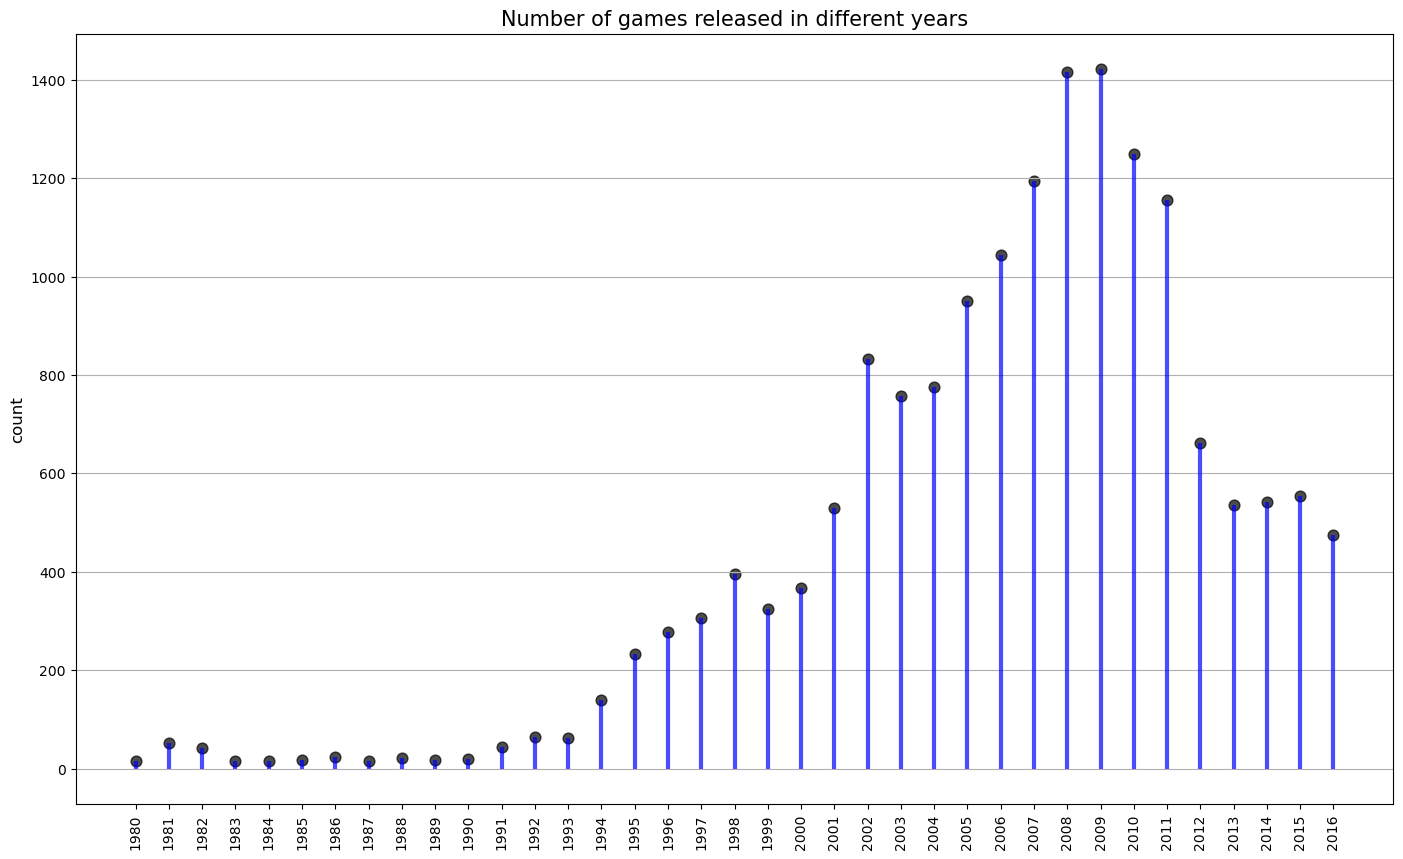

In [76]:
#Creating grouped table with the number of games released in each year
years = data.groupby('year_of_release')['name'].count().reset_index()

#Plotting the graph (scatter plus vertical lines)
fig, ax = plt.subplots(figsize = (17,10))
ax.grid(axis='y')
ax.vlines(x=years.year_of_release, ymin=0, ymax=years.name, color = 'blue', linewidth=3, alpha = 0.7)
ax.scatter(x=years.year_of_release, y=years.name, s=60, color='black', alpha = 0.7)
ax.set_title('Number of games released in different years', fontdict={'size':15})
ax.set_xticks(years.year_of_release, labels = years.year_of_release, rotation=90)
ax.set_ylabel('count',fontdict={'size':12})
plt.show()    

We see that number of games released in each year year is increasing until 2009 year where we have the biggest number of games released, than it decreases. The reason is computer revolution in the end of 90s. But from 2009 - 2010 year the development of computers became relatively stable and we see that in 2013 - 2016 there is almost the same number of games released in each year. So, for our prognosis for 2017 it's better to use data for 2013 - 2016.<br>
Now, let's look at how sales varied from platform to platform. We will plot a bar showing that. And it is reasonable to look only at the period from 1990 because before that year the sales are almost zero, so there is no reason to observe the period before 1990.

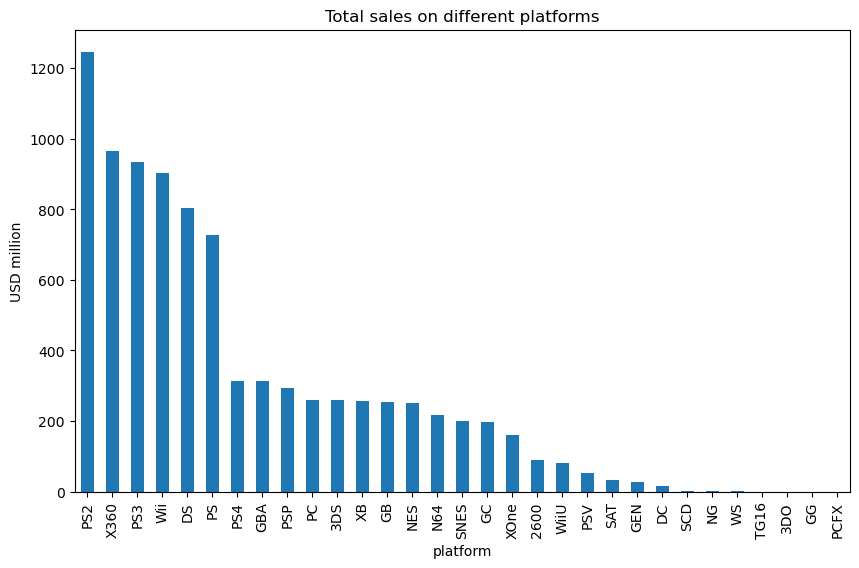

In [77]:
#Creating bar plot which shows the number of sales of different platforms
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind = 'bar', figsize=(10,6))
plt.title('Total sales on different platforms')
plt.ylabel('USD million')
plt.show()

We have 6 leaders:PS2, X360, PS3, Wii, Ds, PS. Playstation is leading if we calculate all the versions of it.<br>
Let's build the distribution of sales of each popular platform over the years. Let's look at these platforms. We will plot the graph, showing the sales of each of the popular models from 1990 till 2016.

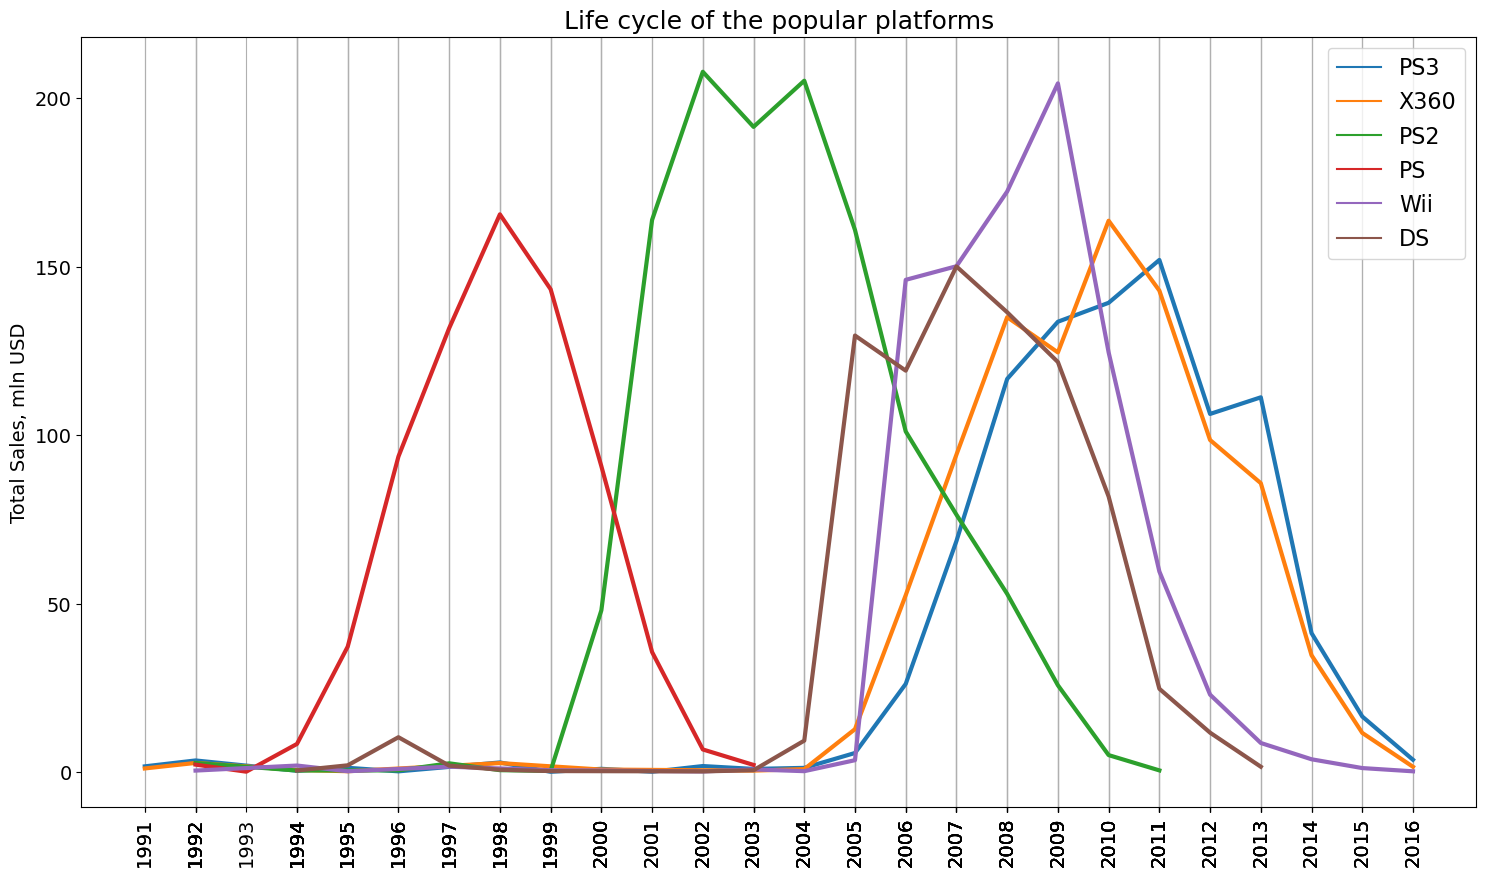

In [78]:
#Grouping the data of sales on the popular platforms from 1990 till 2016.
data_top6_graph = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS") and year_of_release >1990'
    ).groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by = 'year_of_release')

#Plotting the line graph
plt.figure(figsize = (18,10))
ax=sns.lineplot(data = data_top6_graph, x = 'year_of_release', y = 'total_sales', hue ='platform', linewidth=3)
ax.grid(axis='x')
ax.set_title('Life cycle of the popular platforms', fontsize=18)
legend = ax.legend(fontsize=16)
ax.set_ylabel('Total Sales, mln USD', fontsize = 14)
ax.set_xticks(data_top6_graph.year_of_release)
ax.set_xlabel('')
ax.set_xticklabels(data_top6_graph.year_of_release, rotation=90, fontsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.show()

Now, we have one graph that shows us the life cycle of the models which used to be popular but now they have almost disappeared from the market. Let's look at every single platform more carefully.

* It took 3 years for PS2 to reach the peak of sales, and after 2 more years the sales began to decrease significantly. Life-time for PS2 is 5 years.
* The life cycle of X360 differs much from PS2. It took them 3 years from 2005 till 2008 after the start of increase in sales to reach almost the peak, then within 4 years there was high level of sales, and then the sales decrease significantly. So the life time is 7 years.
* Start of increase in sales of PS3 is 2005 year. It is the year where sales of PS2 began to fall. And it took also 3 years for PS2 to reach the high level of sales an they manage to be on that high level of sales within 6 years till 2013. Very long life cycle of 9 years. Even longer than for X360.
* Wii has very quick start just 1 year. And the TOP of sales was within 5 years. So 6 year life time for Wii.
* DS is very similar to Wii. Very quick start for just 1 year. And the top of sales was within 5 years. So 6 year life time for DS as well.
* The cycle for the first popular platform (Playstation) is 3 years to reach the top of sales from 1994 till 1997. And it was on the top fore 4 years more till 2000 where PS2 starts to raise in sales. 7 year cycle for PS.

So our analysis of 6 platforms with the biggest sales showed that it takes usually from 1 to 3 years for platform to reach high level of sales. And it can be on that level for about 3-4 years. So this confirms our decision to analyze data for 4 years from 2013 because it matches the life cycle of platforms.

Now, let's filter the data only for 2013 - 2016 year and find out which platforms are leading in sales, which ones are growing or shrinking. Then we will Select several potentially profitable platforms.

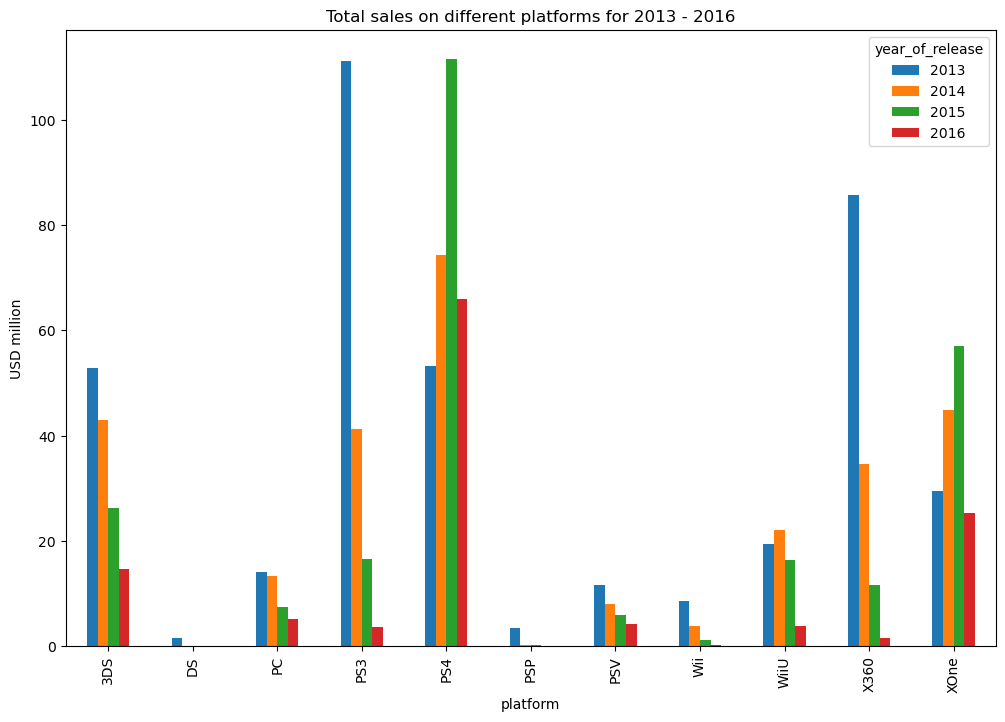

In [79]:
# filter the data for 2013 - 2016 year.
data_recent = data.query('year_of_release >=2013')

#Creating pivot and plotting bar diagram showing the sales on different platforms
data_recent.pivot_table(index = 'platform', columns = 'year_of_release', values = 'total_sales', aggfunc = 'sum').plot(
     kind = 'bar', figsize=(12,8))
plt.title('Total sales on different platforms for 2013 - 2016')
plt.ylabel('USD million')
plt.show()

We can see that the sales on most of the platforms decrease significantly during 2013 - 2016. We have only PS4 and XOne that reached the peak of sales in 2015 year and their sales decreased in 2016 but we can expect that their sales will be more or less on the top for more couple of years. We can see also that the life cycle became shorter. Previously we did not have the situation where the peak of sales was only for one year for popular platforms, now we see this on both popular platforms: PS4 and XOne. So may be the best recommendation for 2017 year will be to develop new platforms, because sales on old ones began to decrease. But still we can expect that PS4 will be the leader in 2017, and XOne will take the silver medal.

Let's look at the distribution of global sales broken down by platforms.

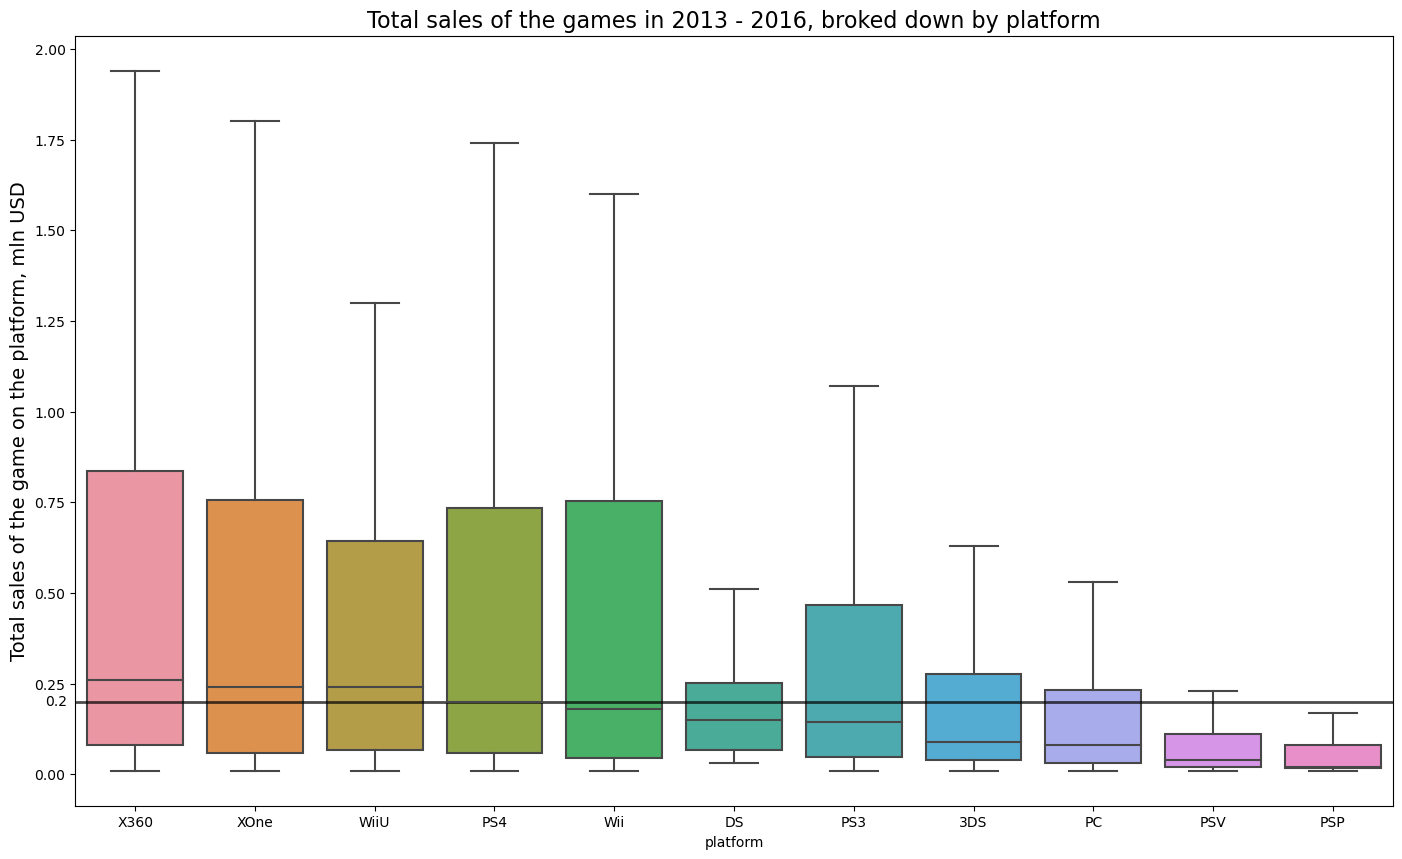

,platform,name,total_sales
585,PS3,Grand Theft Auto V,21.05
1761,X360,Grand Theft Auto V,16.27
853,PS4,Call of Duty: Black Ops 3,14.63
193,3DS,Pokemon X/Pokemon Y,14.60
932,PS4,Grand Theft Auto V,12.62


In [80]:
#Grouping data on platform and name
data_recent_plat = data_recent.groupby(['platform', 'name'])['total_sales'].sum().reset_index().sort_values(
by = 'total_sales', ascending=False)

#Setting up the order of boxplot form highest median of total sales to lowest
median = data_recent_plat.groupby('platform')['total_sales'].median().sort_values(ascending=False)

#Plotting the boxplot of total sales braking down by platforms
plt.figure(figsize=(17,10))
sns.boxplot(data=data_recent_plat, x='platform', y='total_sales', showfliers=False, order=median.index)

#Plotting horizontal line showing sales of 0.2 mln usd per game.
plt.axhline(y=0.2, linewidth=2, color = 'black', alpha = 0.7)
plt.text(x=-0.75, y=0.19, s='0.2', fontsize=10)

ax = plt.gca()
ax.set_ylabel('Total sales of the game on the platform, mln USD', fontsize=14)
plt.title('Total sales of the games in 2013 - 2016, broked down by platform', fontsize = 16)

plt.show()
data_recent_plat.head(5)

We can see that on every platform there are some successful games with very big sales. We have long verticals lines after 75% of sales and we had to switch off outliers in order that our picture was representative. But X360 and XOne have the biggest median sales. So the revenue from more than a half of the games on Microsoft platforms is more than 0.25 mln dollars. So we can say that there are most of successful games on Microsoft platforms. We have 4 platforms which median sales is higher than 0.2 mln dollars, there are PS4 and WiiU on that list besides Microsoft platform. The most successful game is Grand Theft Auto V we have sales on PS3 for 21 mln dollars and on X360 for 16,3 mln dollars.

We see that range of global sales on 11 platforms is pretty big. From 1.5 mln dollars for 4 years to 305 mln dollars. The mean is 96 mln dollars and the median is much less - 61 mln dollars. That's because we have several platforms with high level of sales. We can see the long tail on the top of the graph after the third quantile. PS4 and XOne are the leaders of the market. The sales of the most platforms (75% of them) is below 145 mln dollars.

Let's compare the sales of the same games on different platforms. First we will build a pivot to see for each game (rows) its sales on different platforms (columns). We will calculate totals, sort values in a descending order and then we will chose TOP 5 games which have the biggest sales. Then we will plot diagrams for every game from TOP 5 too see the distribution over the platforms. To do so, we need to remove platforms with all 0 values of sales. The popular games are not necessary being sold through all platforms. We will also remove the totals from our pivot and transpose the pivot so that platforms will be in indexes, and games in columns. Then we will make a loop and print all pie diagrams for each game in one picture.

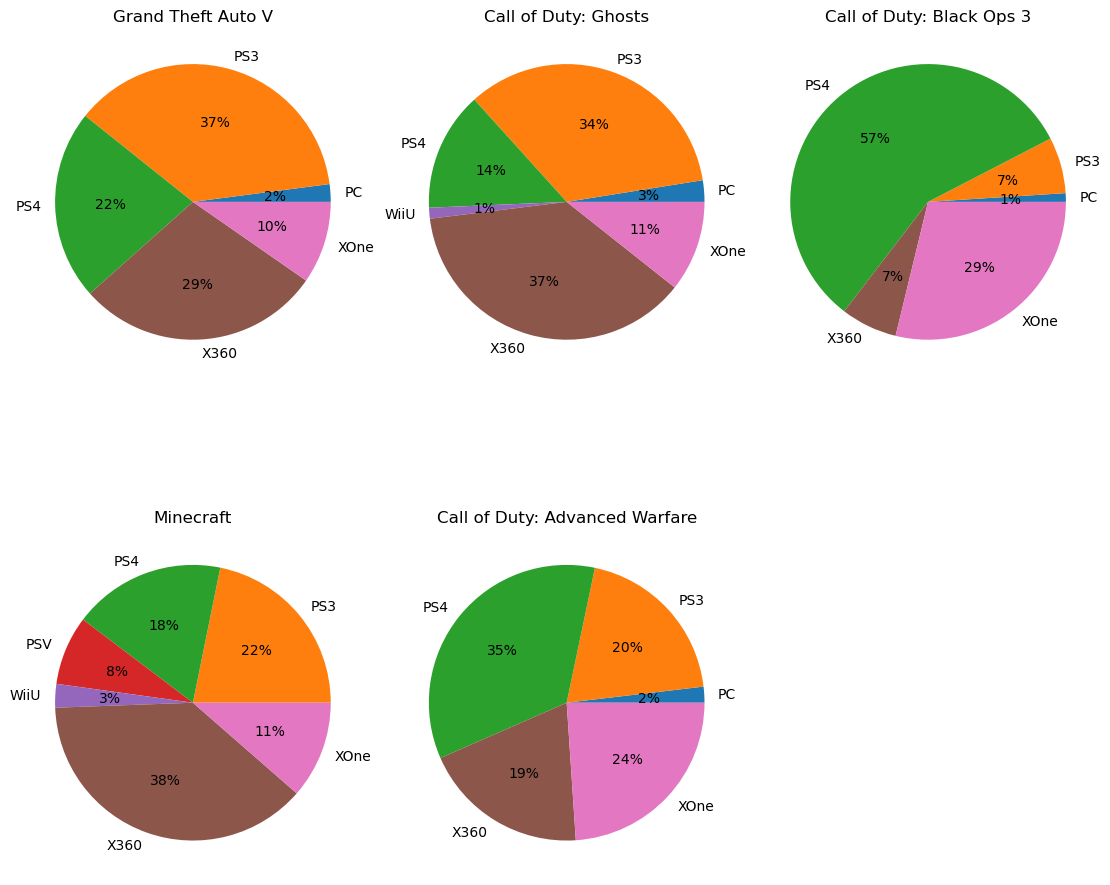

In [81]:
#Building the pivot to compare the sales of the top 5games on different platforms
games_top5 = data_recent.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum',
                   fill_value = 0, margins = True).sort_values(by = "All", ascending = False).head(6)

#Replacing the totals and columns with 0 value in every row
games_top5 = games_top5.drop('All', axis=1)
games_top5 = games_top5[games_top5.index != "All"]
games_top5 = games_top5.drop(games_top5.columns[(games_top5 == 0).all()], axis=1)

#Transpose the pivot and creating variables for names of the platforms and games
games_top5 = games_top5.T
games = games_top5.columns
platforms = games_top5.index

#Defining the function which hides values if there is share below 1%
def my_autopct(pct):
    return '%1.0f%%' % pct if pct > 1 else ''

#Plotting the Pie diagram in one graph
fig, axs = plt.subplots(2, 3, figsize=(11,10), constrained_layout=True)
axs = axs.ravel()
for i, game in enumerate(games):
    values = games_top5[game]
    labels = platforms
    autopct_fmt = lambda x: my_autopct(x) if x > 1 else ''
    labels = np.where(values > 0, labels, '')
    axs[i].pie(values, labels=labels, autopct=autopct_fmt)
    axs[i].set_title(game)
plt.delaxes(axs[5])

We see that actually most popular are different versions of "Call of Duty", "Minecraft" and "Grand Theft Auto". We can see also different versions of Sony Playstation and Microsoft platforms. If we sum them up we will see, that the share of Playstation is 40% - 60% of total sales of the game. And the share of Microsoft (XOne and X360) is 36% - 48% of total sales of the game. So, Playstation is leading and the only game form TOP 5 where Microsoft is leading is Minecraft. Microsoft share is 49% and Sony share is 40%. In Minecraft we have also 8% of mobile Sony platform while the share of other platforms in other TOP 5 games is not more than 3%.

Let's take a short look on average sales on different platforms. We will use groupby and build the pie graph to see this picture.

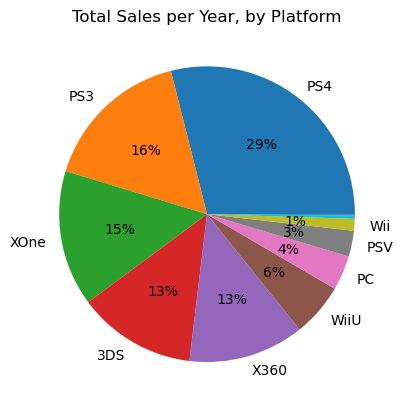

In [82]:
#Grouping the data on platforms and calculating the everage sales per year.
sales_year_platform = data_recent.groupby('platform')['total_sales'].sum().reset_index().sort_values(
    by = 'total_sales', ascending = False)
sales_year_platform['total_sales_per_year'] = sales_year_platform['total_sales'] / 4
sales_year_platform.reset_index(inplace=True)
sales_year_platform

#Plotting the pie diagram
values = sales_year_platform['total_sales_per_year']
labels = sales_year_platform.platform
autopct_fmt = lambda x: my_autopct(x) if x > 1 else ''
labels = np.where(values > 1, labels, '')
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Total Sales per Year, by Platform")
plt.ylabel('')
plt.show()

Now we see that PS4 has much more sales than XOne. We saw that also in other diagrams. The share of PS3,PS4, XOne and X360 is 73%. And 13% for 3DS (Nintendo is pretty big - 4th place). So Nintendo has not much popular games in it, but its share is pretty big in total sales 34 mln dollars per year in average.

Now let's look at how user and professional reviews affect sales for one the most popular platform (PS4). we will Build a scatter plot from data where we have such scores and calculate the correlation between reviews and sales.

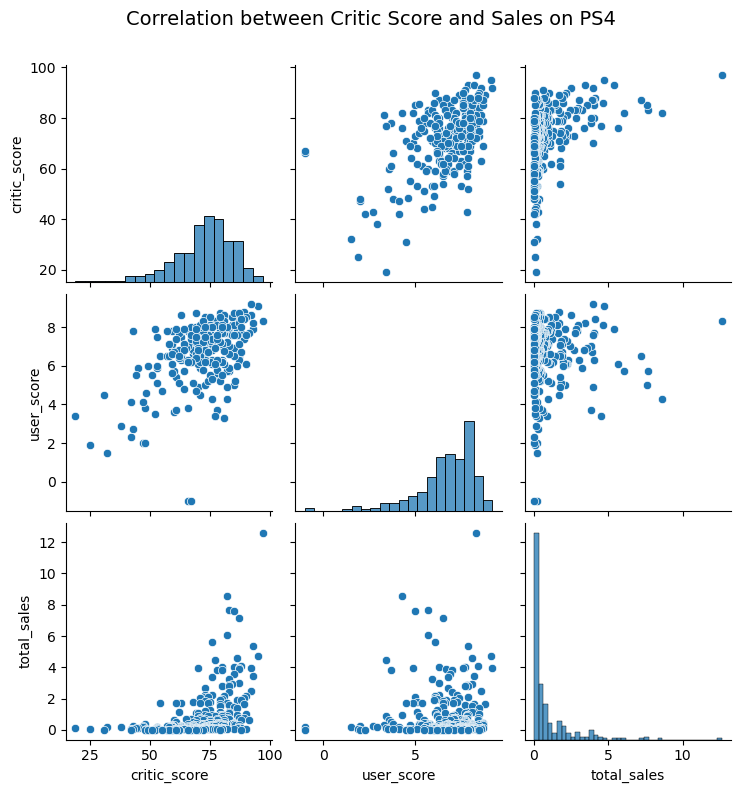

,critic_score,user_score,total_sales
critic_score,1.000000,0.524216,0.411774
user_score,0.524216,1.000000,0.008486
total_sales,0.411774,0.008486,1.000000


In [83]:
# Plotting scatter and calculating correlation between critic score and sales on PS4
data_PS4 = data_recent.query('platform=="PS4" and critic_score !=-1 and user_score !=1')[[
    'critic_score', 'user_score', 'total_sales']]
sns.pairplot(data_PS4)
plt.suptitle('Correlation between Critic Score and Sales on PS4', y=1.05, fontsize=14)
plt.show()
data_PS4.corr()

There is only weak positive correlation between critics reviews and total sales but at the same time there is no correlation between user scores and total sales of PS4 Platform. Let's look also at XOne and 3DS.

,critic_score,user_score,total_sales
critic_score,1.000000,0.451171,0.399297
user_score,0.451171,1.000000,-0.038796
total_sales,0.399297,-0.038796,1.000000


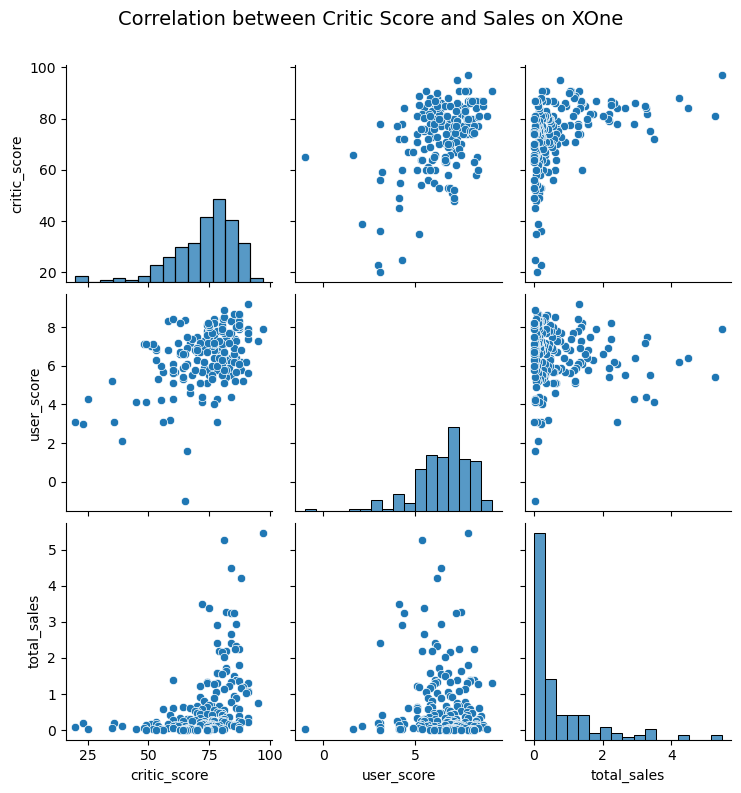

In [84]:
# Plotting scatter and calculating correlation between critic score and sales on XOne
data_XOne = data_recent.query('platform=="XOne"and critic_score !=-1 and user_score !=1')[[
    'critic_score', 'user_score', 'total_sales']]
sns.pairplot(data_XOne)
plt.suptitle('Correlation between Critic Score and Sales on XOne', y=1.05, fontsize=14)
data_XOne.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.451171,0.399297
user_score,0.451171,1.000000,-0.038796
total_sales,0.399297,-0.038796,1.000000


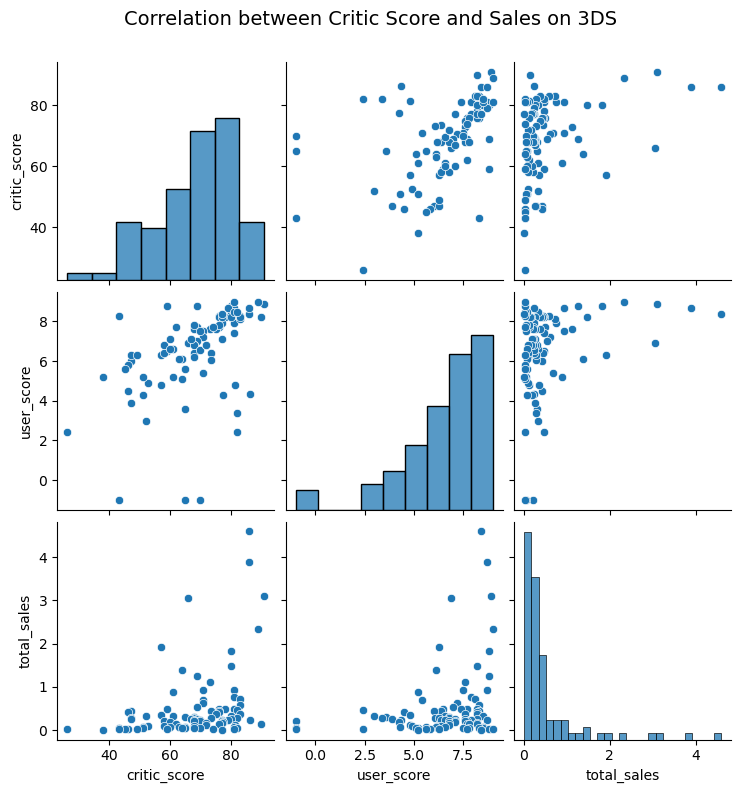

In [85]:
# Plotting scatter and calculating correlation between critic score and sales on 3DS
data_3DS = data_recent.query('platform=="3DS"and critic_score !=-1 and user_score !=1')[[
    'critic_score', 'user_score', 'total_sales']]
sns.pairplot(data_3DS)
plt.suptitle('Correlation between Critic Score and Sales on 3DS', y=1.05, fontsize=14)
data_XOne.corr()

So, on all TOP platforms we have the same situation. Sales does not depend on user reviews but there is a weak correlation between critic scores and total sales. In general users sometimes make their choice taking into account critics reviews.

Now let's look at the general distribution of games by genre and determine what we can say about the most profitable genres.

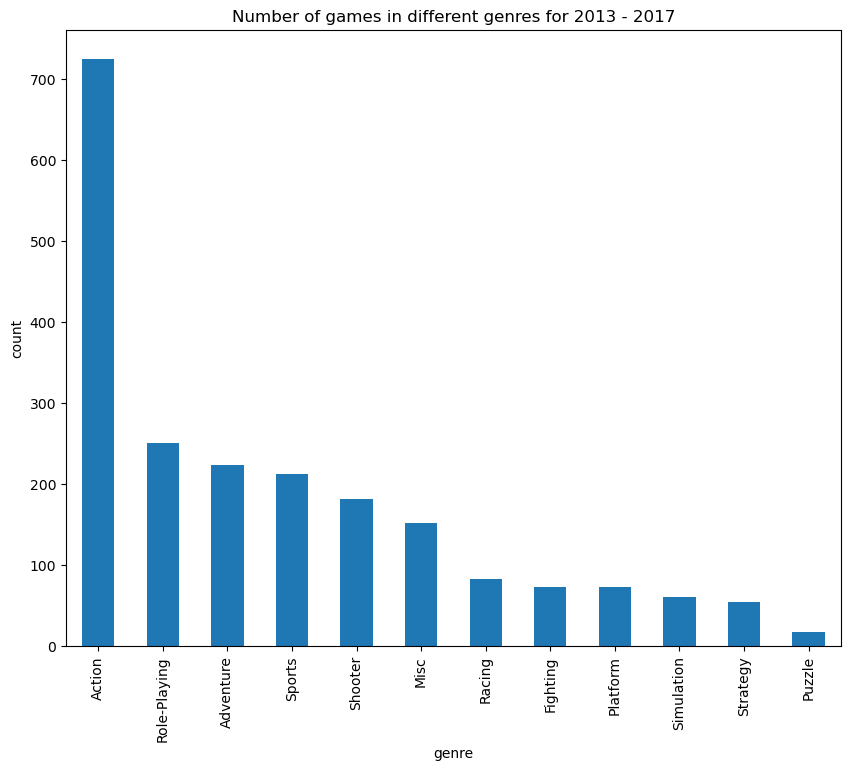

In [86]:
data_recent.groupby('genre')['name'].count().sort_values(ascending = False).plot(kind = 'bar', figsize=(10,8))
plt.title('Number of games in different genres for 2013 - 2017')
plt.ylabel('count')
plt.show()

We see that the most of the games are action other genres are not so popular. There is more than 700 action games and the Role-playing genre which has the second place has only about 250 games sold for 2013 - 2016.
Let's look at the revenue from different genres.

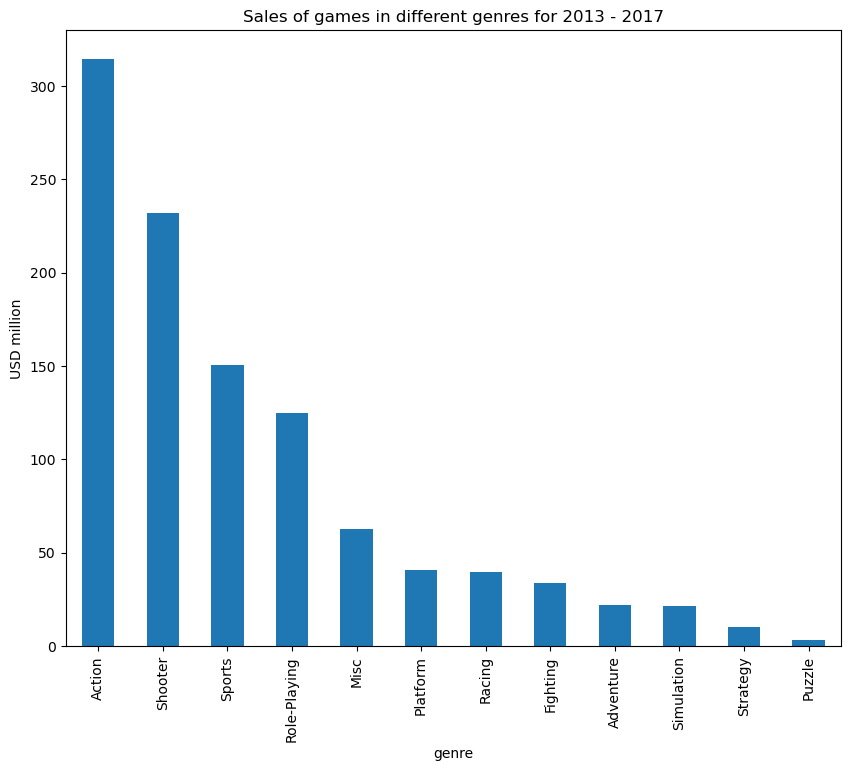

In [87]:
data_recent.groupby('genre')['total_sales'].sum().sort_values(ascending = False).plot(kind = 'bar', figsize=(10,8))
plt.title('Sales of games in different genres for 2013 - 2017')
plt.ylabel('USD million')
plt.show()

The situation in Sales differs from the quantity of sold games. Action is leading but The sales form Shooters is rather big, about 230 mln and action sales is a bit more than 300 mln. So that means that shooter games are the most expensive.<br>
Let's make a diagram showing the average sales from one game in different genres in 2013 - 2016. We will divide sales by quantity of games in specific genre to see this picture.

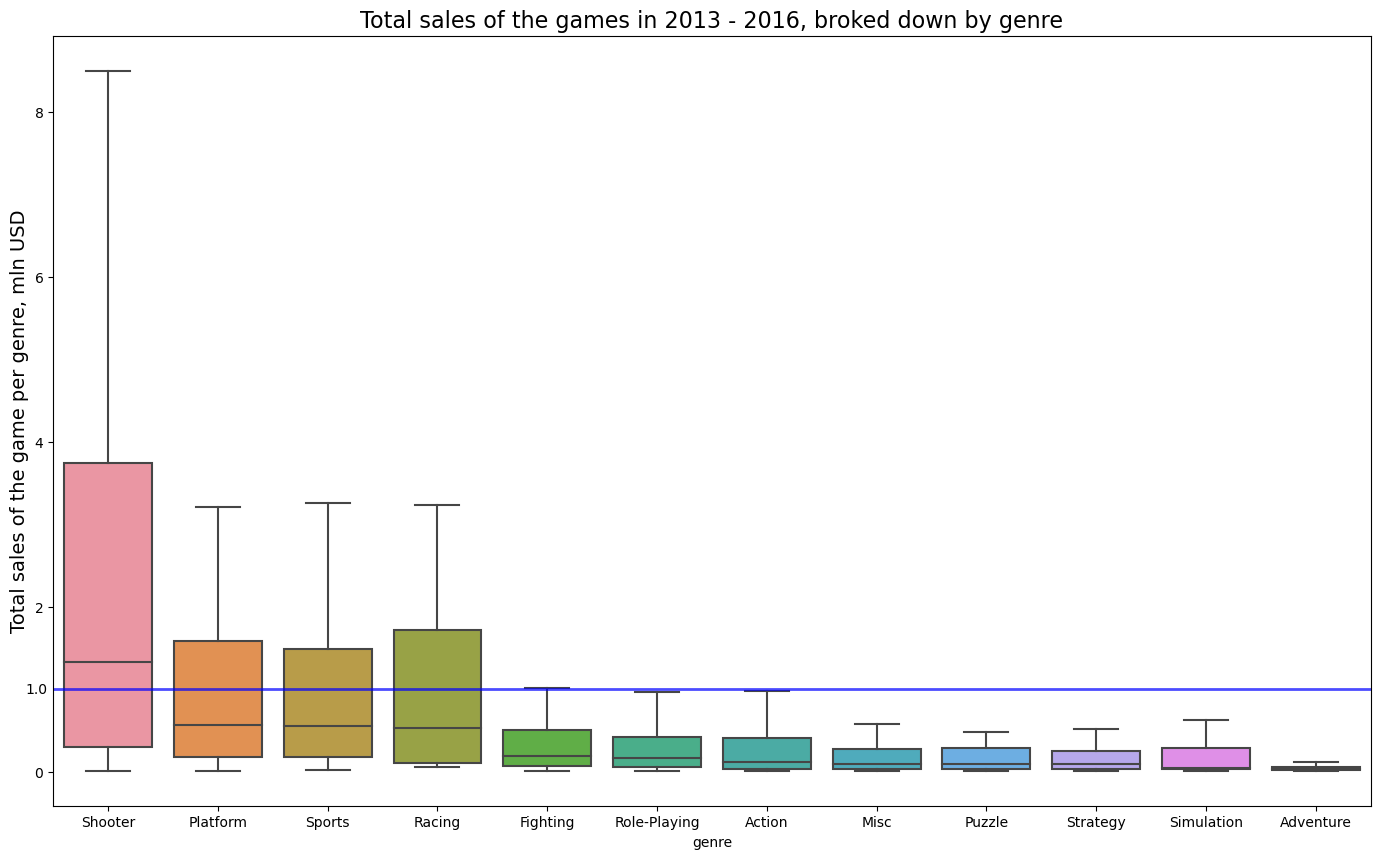

,genre,name,total_sales
131,Action,Grand Theft Auto V,56.58
955,Shooter,Call of Duty: Ghosts,27.39
954,Shooter,Call of Duty: Black Ops 3,25.67
635,Misc,Minecraft,24.16
953,Shooter,Call of Duty: Advanced Warfare,21.97


In [88]:
#Grouping the data on names and genres and calculating total sales
data_genre = data_recent.groupby(['genre', 'name'])['total_sales'].sum().reset_index().sort_values(
    by ='total_sales', ascending = False)

#Creating the order of the boxplots according to median sales
median = data_genre.groupby('genre')['total_sales'].median().sort_values(ascending=False)

#Plotting the graph
plt.figure(figsize=(17,10))
sns.boxplot(data=data_genre, x='genre', y='total_sales', showfliers=False, order=median.index)

#Plotting horizontal line showing sales of 1 mln usd per game.
plt.axhline(y=1, linewidth=2, color = 'blue', alpha = 0.7)
plt.text(x=-0.75, y=0.95, s='1.0', fontsize=10)

ax = plt.gca()
ax.set_ylabel('Total sales of the game per genre, mln USD', fontsize=14)
plt.title('Total sales of the games in 2013 - 2016, broked down by genre', fontsize = 16)

plt.show()
plt.show()
data_genre.head(5)

So interesting picture. The average sales of one shooter game is 1.3 mln dollars for 4 years, sales of one game of other genres is at least twice less. Although we have not many different shooter games, but they are being sold very well. The most of genres have small number of games that are being sold very well. There are long tails after the 75% of the games in each genre. Although The best sales (56.6 mln dollars) has Grand Theft Auto V which is Action, but in average 75% of action games have sales less than 0.5 mln dollars.

So, We have 2 leaders in genres. We have many action games and sales of action game is the biggest, but we also have shooter games where there is not so many different games, but each game is being sold very well and total sales of shooter games is on the second place with the sales about 230 mln dollars for 2013 - 2016.

## User profile for each region.

Let's create a user profile for each region. For each region (NA, EU, JP) we will determine: The TOP 5 platforms, the TOP 5 genres. And then we will find out whether ESRB ratings affect sales in individual regions.<br>
In order to do it we will look at the sales in different regions.

Let's find TOP 5 platforms and TOP 5 genres in NA

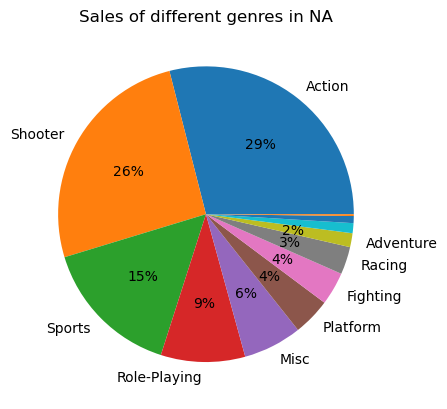

In [89]:
#Grouping the data in genres
na_top5g = data_recent.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)

#Defining the values and lables
values = na_top5g['na_sales']
labels = na_top5g.genre

#Hiding labels with small share
labels = np.where(values >5, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different genres in NA
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different genres in NA")
plt.ylabel('')
plt.show()

So, our TOP 5 genres in NA region are Action (29% of Sales), Shooter (26%), Sports (15%), Role-Playing (9%), and others -misc (6%).
Let's find out TOP 5 platforms in NA region.

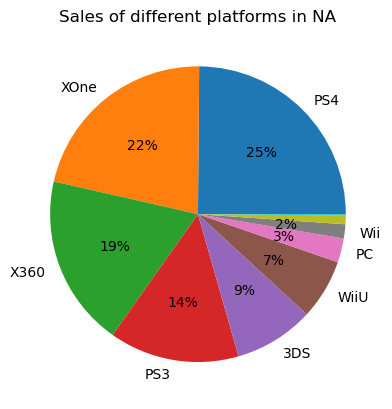

In [90]:
#Grouping the data in platforms
na_top5p = data_recent.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending = False)

#Defining the values and lables
values = na_top5p['na_sales']
labels = na_top5p.platform

#Hiding labels with small share
labels = np.where(values >5, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different platforms in NA
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different platforms in NA")
plt.ylabel('')
plt.show()

Our TOP 5 platforms in NA region are PS4 (25% of Sales), XOne (22%), X360 (19%), PS3 (14%), and 3DS (9%). We see that the Share of Sony and Microsoft together is 80%. And about 40% for each of them. These are the most competing platforms in NA region. The share of Nintendo is 9% of total sales in the region.

Let's build the same ratings for Europe region.

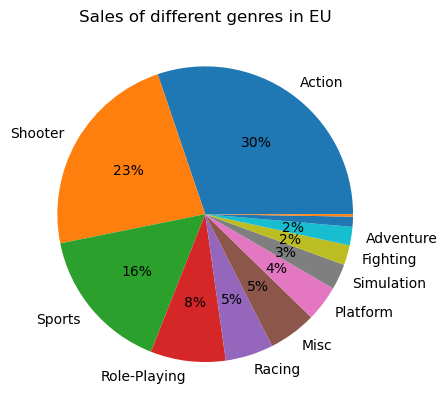

In [91]:
#Grouping the data in genres
eu_top5g = data_recent.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)

#Defining the values and lables
values = eu_top5g['eu_sales']
labels = eu_top5g.genre

#Hiding labels with small share
labels = np.where(values >5, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different genres in EU
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different genres in EU")
plt.ylabel('')
plt.show()

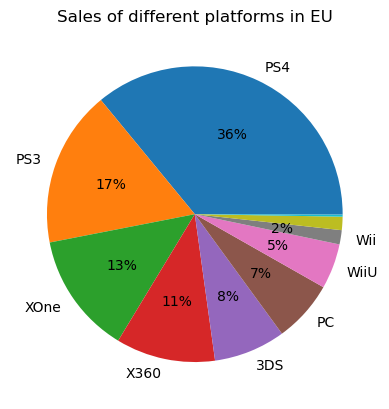

In [92]:
#Grouping the data in platforms
eu_top5p = data_recent.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)

#Defining the values and lables
values = eu_top5p['eu_sales']
labels = eu_top5p.platform

#Hiding labels with small share
labels = np.where(values >5.8, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different platforms in EU
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different platforms in EU")
plt.ylabel('')
plt.show()

Here are the ratings for EU region. TOP 5 genres: Action (30% of Sales), Shooter (23%) Sports (16%), Role-Playing (8%), and racing (5%).TOP 5 platforms: PS4 (36% of Sales), PS3 (17%), XOne (13%), X360 (11%), and 3DS (8%).<br>
We see that genres rating is almost the same for EU as for NA, but we have some changes in Platforms. Now Sony is leading with its share of 53%, Microsoft has the share of 24% and Nintendo has almost the same share in sales as it has for NA region - 8%.

Lets look at Japan.

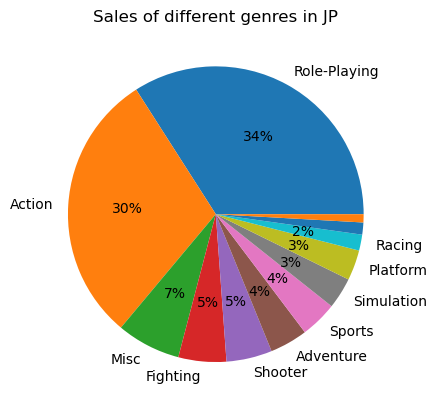

In [93]:
#Grouping the data in genres
jp_top5g = data_recent.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)

#Defining the values and lables
values = jp_top5g['jp_sales']
labels = jp_top5g.genre

#Hiding labels with small share
labels = np.where(values >2, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different genres in JP
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different genres in JP")
plt.ylabel('')
plt.show()

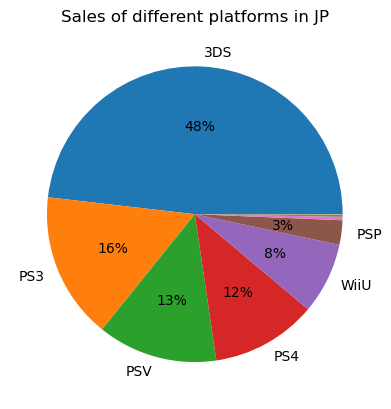

In [94]:
#Grouping the data in platforms
jp_top5p = data_recent.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)

#Defining the values and lables
values = jp_top5p['jp_sales']
labels = jp_top5p.platform

#Hiding labels with small share
labels = np.where(values >3, labels, '')
autopct_fmt = lambda x: my_autopct(x) if x > 1.5 else ''

#Plotting pie graph with sales in different platforms in JP
plt.pie(values, labels=labels, autopct=autopct_fmt)
plt.title("Sales of different platforms in JP")
plt.ylabel('')
plt.show()

Here are the ratings for JP region. TOP 5 genres: Role-Playing (34% of Sales), Action (30%), Misc (7%), Fighting (5%), and Shooter (5%).TOP 5 platforms: 3DS (48% of Sales), PS3 (16%), PSV (13%), PS4 (12%), and WiiU (8%).<br>
We see the significant changes of users behavior in Japan. While Action is still popular and its share of sales is 30% as it is in NA and EU, the most popular genre is Role-playing with its share 34% of Sales. There is absolutely different picture of platforms, where japan platforms have the whole market. Nintendo is the leader with its share almost the half of total sales in the region (48%), Sony platforms have the share 41% of the market and WiiU has 8%, rather big if we compare with NA and EU regions where its share is a couple of percent. And there is no Microsoft platforms on Japan video games market.

Now lets check whether ESRB ratings affect sales in individual regions. We will make bar plots to check this

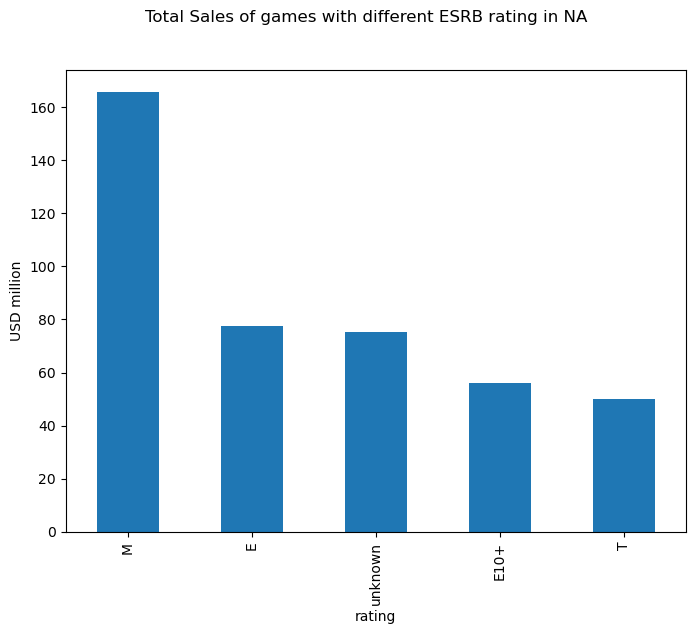

In [95]:
# Grouping the data by rating to see the sales in NA region
data_na = data_recent.groupby('rating')['na_sales'].sum().sort_values(ascending = False)

#Plotting the bar diagram
data_na.plot(kind = 'bar', figsize = (8,6))
plt.suptitle('Total Sales of games with different ESRB rating in NA')
plt.ylabel('USD million')
plt.show()

We can say that the most sales have the games for mature people over 17 years old. We can not make conclusion for other ratings because their sales do not differ much and we have big share of the games with unknown rating.

Let's look at EU region.

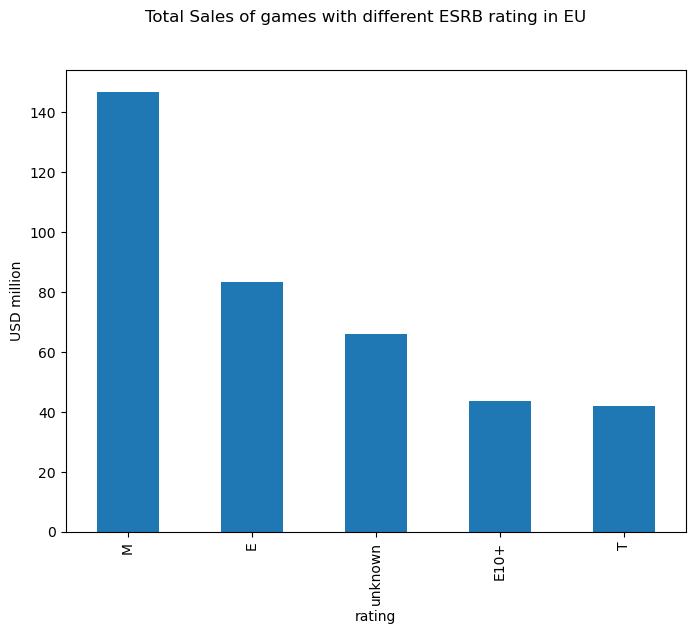

In [96]:
# Grouping the data by rating to see the sales in EU region
data_eu = data_recent.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)

#Plotting the bar diagram
data_eu.plot(kind = 'bar', figsize = (8,6))
plt.suptitle('Total Sales of games with different ESRB rating in EU')
plt.ylabel('USD million')
plt.show()

In Europe we have the same picture. Most popular are games for mature people over 17 years old.

Now, let's look at Japan where we can expect changes in users behavior.

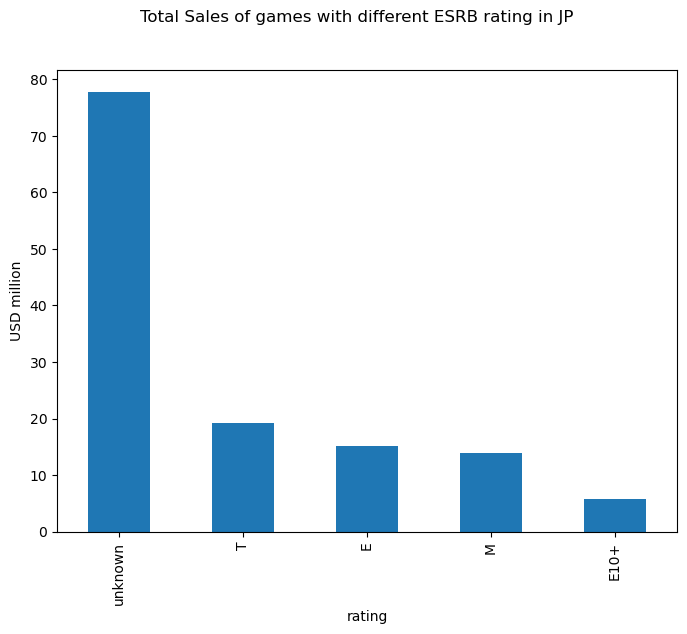

In [97]:
# Grouping the data by rating to see the sales in jp region
data_jp = data_recent.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)

#Plotting the bar diagram
data_jp.plot(kind = 'bar', figsize = (8,6))
plt.suptitle('Total Sales of games with different ESRB rating in JP')
plt.ylabel('USD million')
plt.show()

Looking in that picture we can only say that the best-selling games are games without a rating. The effect of ESRB rating on regional sales is not so strong as it is in Europe and North America.

So in NA and EU region total sales depend on ESRB rating of the games. The best selling games have M ratings, so they are fore people over 17 years old. In Japan the effect of ESRB rating on regional sales is not so strong and best selling are games without a rating.

## Testing hypotheses

Now it it time for testing our hypotheses. We need to check whether average user scores of the Xbox One and PC platforms are the same and whether Average user scores for the Action and Sports genres are different.

Let's start with the first hypothesis. To do this part of the analysis we will make 2 groups of data one for XOne and the other for PC with the `user_score` column in both lists and we will perform Student test to compare these groups. But first we will calculate the mean and the variance to determine parameters of our test.

Our hypotheses will be formulated in the following way:<br>
$H_0$:The difference between average user ratings of the Xbox One and PC platforms are statistically insignificant.<br>
$H_1$:The difference between average user ratings of the Xbox One and PC platforms are statistically significant. Xbox games have higher ratings.

In [98]:
#Creating 2 grupes of the data
data_XOne = data_recent.query('platform=="XOne"')['user_score']
data_PC = data_recent.query('platform=="PC"')['user_score']

#Calculating mean and variance of the data groups
print('Mean user scores for XOne platform is', np.mean(data_XOne), 
      'Variance is', np.var(data_XOne))
print('Mean user scores for PC platform is', np.mean(data_PC), 
      'Variance is', np.var(data_PC))

Mean user scores for XOne platform is 5.290471014492753 Variance is 9.426800804715388
Mean user scores for PC platform is 5.088758865248225 Variance is 9.570190185352844


Looking at these numbers we can believe that our hypotheses is correct, because we have almost the same mean and variance values. But let's check. We will set the parameter of statistics significance to 5% and perform the Student test with equal variation in order that our results will be more accurate.

In [99]:
# Test null hypothesis
alpha = 0.05  
results = st.ttest_ind(data_XOne, data_PC, equal_var=True)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Users score of XOne and PC platforms differ from each other")
else:
    print("We can't reject the null hypothesis. There is a probability that difference between users score of XOne \
and PC platforms is statistically insignificant")

p-value:  0.5068483921564337
We can't reject the null hypothesis. There is a probability that difference between users score of XOne and PC platforms is statistically insignificant


Our first null hypothesis is true. There is a big probability (50.7%) that difference between users score of XOne and PC platforms is statistically insignificant.

Let's check our second hypothesis that average user scores for the Action and Sports genres are different, action genre games have higher ratings. We will do the same thing. First, we will make 2 groups of data one for Action and the other one for Sports genre with the user_score column in both lists and we will perform Student test to compare these groups. Before testing we calculate the mean and variance to determine parameters of our test. We will set statistics significance parameter to 5% also for two-sided test which will test our null hypothesis. If Our null hypothesis will be rejected we will use one-sided test in order to check that users score for Action games are higher than for Sports games. We will reduce alpha value to 2.5% for that test.

Our hypotheses will be formulated in the following way:<br>
$H_0$: Difference in average user scores for the Action and Sports genres is statistically insignificant.<br>
$H_1$: Difference in average user scores for the Action and Sports genres is statistically significant, action genre games have higher user scores.

In [100]:
#Creating 2 groupes of the data
data_action = data_recent.query('genre=="Action"')['user_score']
data_sports = data_recent.query('genre=="Sports"')['user_score']

#Calculating mean and variance of the data groups
print('Mean user scores for Action genre is', np.mean(data_action), 
      'Variance is', np.var(data_action))
print('Mean user scores for Sports genre is', np.mean(data_sports), 
      'Variance is', np.var(data_sports))

Mean user scores for Action genre is 3.550512200736651 Variance is 15.814456003956257
Mean user scores for Sports genre is 4.232335680751173 Variance is 7.553295904141592


The difference in variance is about 2 times, so we will perform Student test with different variances. We can see larger difference in mean that we saw during platforms analysis. we see that the mean value for sports genre is higher than for action genre. So we can expect that our second hypothesis is not correct. But let's check this.

In [101]:
# Test null hypothesis
alpha = 0.05  
results = st.ttest_ind(data_sports, data_action, equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis. Difference in users score of action and sports genres is \
statistically significant")
else:
    print("We can't reject the null hypothesis. There is a probability that diffrence in users scores of action \
and sports genres is statistically insignificant")
    
# Test alternative hypothesis
alpha = 0.025  
results = st.ttest_ind(data_sports, data_action, equal_var=False, alternative = 'greater')
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the alternative hypothesis. Users scores for action games is statistically \
lower than for sports games")
else:
    print("We can't reject the alternative hypothesis. Users scores for action games \
is statistically higher than for sports games")

p-value:  0.004647972602769305
We reject the null hypothesis. Difference in users score of action and sports genres is statistically significant
p-value:  0.0023239863013846526
We reject the alternative hypothesis. Users scores for action games is statistically lower than for sports games


We saw that probability of the truth of our null hypotheses is less than 1%, So the users scores for action and sports genres seem to be different and there is a probability of almost 98% that sport games have higher scores from users than action games. Our second Hypothesis is incorrect.

## General conclusion.

In the project we have analyzed the on-line store Ice, which sells video games all over the world. Historical data on game sales were available from open sources. We needed to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns. Purpose of the analysis was to determine the factors which make the games more successful.

We had some problems with data. The columns were not in lowercase, the type of `year_of_release` column was float, but should be integer and we had many missing values in some columns which are needed in our analysis. During data preprocessing stage of the project we successfully solved issues with lower case of the columns and with the column types. As we had 269 missing values in `year_of_release` column, we restored some of them using the minimum value of that game in our DateFrame, but still 146 rows of missing values left. We had only to drop them because we had no info about those games. It was less than 1% of our data. So, the results are relevant without this small part of data. We were not much lucky also during restoring the missing values in `rating`, `critic_score` and `user_score` columns where almost the half of the data on those columns left as missing values. Because that part of data is very big, we did not drop any part of it but changed a bit the presentation of the missing values. For rating column we replaced the old ratings: EC and K-A with E and RP (rating pending) with "unknown". Also we marked missing values as 'unknown' and for users and critic score we marked them as -1, because other data values in those columns are positive. So, we can still evaluate patterns for users and critic score and we can differ scores where we have no info about it in our DataFrame from other scores.

During the main part of our analysis we discovered that number of games released per year is increasing until 2009 year where is the biggest number of games released, then it decreases. The reason is computer revolution in the end of 90s. But from 2009 - 2010 year the development of computers became relatively stable and we see that in 2013 - 2016 there is almost the same number of games released in each year. So, for our prognosis for 2017 we decided to use more relevant data which is for 2013 - 2016 years. Our analysis of 6 platforms with the biggest sales showed that **it takes usually from 1 to 3 years for platform to reach high level of sales. And it can be on that level for about 3-4 years.**

During analysis of the platforms we saw only PS4 and XOne that reached the peak of sales in 2015 year and their sales decreased in 2016 but we can expect that their sales will be more o less on top for more couple of years. We can see also that the life cycle became shorter. **The best recommendation for 2017 year will be to develop new platforms, because sales on old ones began to decrease. But still we can expect that PS4 will be the leader in 2017, and XOne will take the silver medal.
*The share of Playstation is 40% - 60% of total sales of the game. And the share of Microsoft (XOne and X360) is 36% - 48% of total sales of the game. The share of PS3,PS4, XOne and X360 together is 73% of total sales. And we have share of 13% for 3DS (Nintendo).**

During analysis of the different games We saw that actually **most popular are different versions of "Call of Duty", "Minecraft" and "Grand Theft Auto".**

We have analyzed the data on all top platforms in order to determine whether the sales depend on user or critic score in their reviews. the results were negative. We did not find strong correlation between that factors and we can conclude that **Sales do not depend on users reviews but there is weak positive correlation between critic scores and total sales of the games.**

When analyzing the genres of the games **we have found 2 leaders in genres: Action and Shooter.** We have many action games and sales of action game is the biggest, but we also have shooter games where there is not so many different games, but each game is being sold very well and total sales of shooter games is on the second place with the sales about 230 mln dollars for 2013 - 2016.

Then we analyzed the data in different regions to create a user profile for each region. For each region (NA, EU, JP) we have determined: the TOP five platforms, the TOP five genres. And then we have tried to find out whether ESRB ratings affect sales in individual regions. **We noticed the significant changes of users behavior in Japan if we compare it with NA and EU regions.** While Action is still popular and its share of sales 30% as it is in NA and EU. The most popular genre is Role-playing with its share 34% of Sales. There is absolutely different picture of platforms, where japan platforms have the whole market. Nintendo is the leader with its share almost the half of total sales in the region (48%), Sony platforms have the share of 41% of the market and WiiU has 8%, rather big if we compare with NA and EU regions where its share is a couple of percent. And there is no Microsoft platforms on Japan video games market. In NA and EU regions the TOP genres are Action (29% of Sales), Shooter (26%) and Sports (15%) and we saw that the Share of Sony and Microsoft together is 80%. While both Microsoft and Sony have its share of about 40% in NA, Sony has the first place in Europe. **Unfortunately we can make a conclusion that in NA and EU region total sales depend on ESRB rating of the games.** The best selling games have M ratings, so they are fore people over 17 years old. **In Japan the effect of ESRB rating on regional sales is not so strong** and best selling are games without a rating.

In the final part of our analysis we checked our hypotheses in order to make a conclusion whether the difference in average user ratings of the Xbox One and PC platforms is statistically insignificant and whether action genre games have statistically higher users ratings than sports games. We performed Student test to check this. The test has showed that **our first null hypothesis is true. There is a big probability (50.7%) that difference in users score of XOne and PC platforms is statistically insignificant.** The users scores for action and sports genres seem to be different but **there is almost 98% of the probability that sport games have statistically higher scores from users than action games. So our second Hypothesis is incorrect.**